In [1]:
#PP

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import prepocess_functs_CL as pp
from sklearn.utils import shuffle

In [3]:
nticks = 200
ADC_MIN = 3
path = '../../../../train_dune_lartpc_v2/'
wireplane='U'

In [4]:
wireplane = 'U'
# load raw data
combined_data, combined_clean_data, combined_noise = pp.get_data(wireplane, path)
print('---------------------------------')
print('     signal+noise: ', len(combined_data))
print('     clean signal: ', len(combined_clean_data))
print('     noise       : ', len(combined_noise))
print('---------------------------------')

# extract waveforms
signal_waveforms = pp.get_std_waveforms(combined_data, nticks)
clean_signal_waveforms = pp.get_std_waveforms(combined_clean_data, nticks)  # for autoencoder
print('')
print('filtering out small signals --> ADC >', ADC_MIN)
print('     noise+signal : ', signal_waveforms.shape)
print('     clean signal : ', clean_signal_waveforms.shape)
#Filter out tiny signals < ADC_MIN, but leave big signals to test on (incl > ADC_MAX)
signal_waveforms, clean_signal_waveforms = pp.filter_signal_ADC_min(signal_waveforms,
                                            clean_signal_waveforms, ADC_MIN)
print('------------after filtering------------')
print('     noise+signal : ', signal_waveforms.shape)
print('     clean signal : ', clean_signal_waveforms.shape)

grouped_waves = pp.adc_grouping(signal_waveforms, clean_signal_waveforms)
grouped_waves = grouped_waves[0]


nu_cc:  ../../../../train_dune_lartpc_v2/nu_cc/
nu_es:  ../../../../train_dune_lartpc_v2/nu_es/
noise:  ../../../../train_dune_lartpc_v2/noise/

----------loading----------
--------data loaded!-------
---------------------------------
     signal+noise:  218916
     clean signal:  218916
     noise       :  100000
---------------------------------

filtering out small signals --> ADC > 3
     noise+signal :  (218916, 200)
     clean signal :  (218916, 200)
------------after filtering------------
     noise+signal :  (126967, 200)
     clean signal :  (126967, 200)
 0: adc_4_6             1: adc_7_9             2: adc_10_12             3: adc_13_15             4: adc_16_18             5: adc_19_21             6: adc_gt_21          

adc_4_6
count       14155

adc_7_9
count       9914

adc_10_12
count       7921

adc_13_15
count       6396

adc_16_18
count       5210

adc_19_21
count       4561

adc_gt_21
count       78810

     Total:    126967


In [5]:
# shuffle dataset
for k in range(10):
    for i in range(len(grouped_waves)):
        grouped_waves[i][0], grouped_waves[i][1] = shuffle(grouped_waves[i][0], grouped_waves[i][1])

num_samples = 4000
for i in range(len(grouped_waves)):
    grouped_waves[i][0] = grouped_waves[i][0][:num_samples]
    grouped_waves[i][1] = grouped_waves[i][1][:num_samples]

for i in range(len(grouped_waves)):
    print('----')
    print(len(grouped_waves[i][0]), len(grouped_waves[i][1]))

# shuffle dataset
for k in range(10):
    for i in range(len(grouped_waves)):
        grouped_waves[i][0], grouped_waves[i][1] = shuffle(grouped_waves[i][0], grouped_waves[i][1])



----
4000 4000
----
4000 4000
----
4000 4000
----
4000 4000
----
4000 4000
----
4000 4000
----
4000 4000


In [6]:
pp.group_num_labels

{0: 'adc_4_6',
 1: 'adc_7_9',
 2: 'adc_10_12',
 3: 'adc_13_15',
 4: 'adc_16_18',
 5: 'adc_19_21',
 6: 'adc_gt_21'}

In [7]:
noise_waveforms = pp.get_std_waveforms(combined_noise, nticks)
noiseless_waveform = noise_waveforms*0 # for autoencoder
print(len(noise_waveforms), len(noiseless_waveform))

for i in range(100):
    noise_waveforms, noiseless_waveform = shuffle(noise_waveforms, noiseless_waveform)


100000 100000


In [8]:
idx = 0
noise_x_0 = noise_waveforms[idx:num_samples+idx]
noise_y_0 = noiseless_waveform[idx:num_samples+idx]
idx+=num_samples
print(len(noise_x_0), len(noise_y_0))
print(idx)
print('----')

noise_x_1 = noise_waveforms[idx:num_samples+idx]
noise_y_1 = noiseless_waveform[idx:num_samples+idx]
idx+=num_samples
print(len(noise_x_1), len(noise_y_1))
print(idx)
print('----')


noise_x_2 = noise_waveforms[idx:num_samples+idx]
noise_y_2 = noiseless_waveform[idx:num_samples+idx]
idx+=num_samples
print(len(noise_x_2), len(noise_y_2))
print(idx)
print('----')

noise_x_3 = noise_waveforms[idx:num_samples+idx]
noise_y_3 = noiseless_waveform[idx:num_samples+idx]
idx+=num_samples
print(len(noise_x_3), len(noise_y_3))
print(idx)
print('----')

noise_x_4 = noise_waveforms[idx:num_samples+idx]
noise_y_4 = noiseless_waveform[idx:num_samples+idx]
idx+=num_samples
print(len(noise_x_4), len(noise_y_4))
print(idx)
print('----')

noise_x_5 = noise_waveforms[idx:num_samples+idx]
noise_y_5 = noiseless_waveform[idx:num_samples+idx]
idx+=num_samples
print(len(noise_x_5), len(noise_y_5))
print(idx)
print('----')

noise_x_6 = noise_waveforms[idx:num_samples+idx]
noise_y_6 = noiseless_waveform[idx:num_samples+idx]
idx+=num_samples
print(len(noise_x_6), len(noise_y_6))
print(idx)
print('----')



4000 4000
4000
----
4000 4000
8000
----
4000 4000
12000
----
4000 4000
16000
----
4000 4000
20000
----
4000 4000
24000
----
4000 4000
28000
----


In [9]:
group_ = 0
idx = 0
adc_0_x_train, adc_0_x_test, adc_0_y_train, adc_0_y_test = train_test_split(grouped_waves[group_][0], 
                                                                                            grouped_waves[group_][1],
                                                                                            test_size=0.5, shuffle=True)

noise_0_x_train, noise_0_x_test, noise_0_y_train, noise_0_y_test = train_test_split(noise_x_0, 
                                                                                            noise_y_0,
                                                                                            test_size=0.5, shuffle=True)

adc_0_x_train = np.concatenate((adc_0_x_train, noise_0_x_train))
adc_0_y_train = np.concatenate((adc_0_y_train, noise_0_y_train))

adc_0_x_test = np.concatenate((adc_0_x_test, noise_0_x_train))
adc_0_y_test = np.concatenate((adc_0_y_test, noise_0_y_test))

adc_0_x_train, adc_0_x_valid, adc_0_y_train, adc_0_y_valid = train_test_split(adc_0_x_train, adc_0_y_train, test_size=0.2, shuffle=True)

print(len(adc_0_x_train), len(adc_0_x_test), len(adc_0_y_train), len(adc_0_y_test), len(adc_0_x_valid), len(adc_0_y_valid))

for i in range(10):
    adc_0_x_train, adc_0_y_train = shuffle(adc_0_x_train, adc_0_y_train)
    adc_0_x_test, adc_0_y_test = shuffle(adc_0_x_test, adc_0_y_test)
    adc_0_x_valid, adc_0_y_valid = shuffle(adc_0_x_valid, adc_0_y_valid)

print('-----')





group_ = 1
adc_1_x_train, adc_1_x_test, adc_1_y_train, adc_1_y_test = train_test_split(grouped_waves[group_][0], 
                                                                                            grouped_waves[group_][1],
                                                                                            test_size=0.5, shuffle=True)

noise_1_x_train, noise_1_x_test, noise_1_y_train, noise_1_y_test = train_test_split(noise_x_1, 
                                                                                            noise_y_1,
                                                                                            test_size=0.5, shuffle=True)

adc_1_x_train = np.concatenate((adc_1_x_train, noise_0_x_train))
adc_1_y_train = np.concatenate((adc_1_y_train, noise_0_y_train))

adc_1_x_test = np.concatenate((adc_1_x_test, noise_1_x_train))
adc_1_y_test = np.concatenate((adc_1_y_test, noise_1_y_test))

adc_1_x_train, adc_1_x_valid, adc_1_y_train, adc_1_y_valid = train_test_split(adc_1_x_train, adc_1_y_train, test_size=0.2, shuffle=True)

print(len(adc_1_x_train), len(adc_1_x_test), len(adc_1_y_train), len(adc_1_y_test), len(adc_1_x_valid), len(adc_1_y_valid))

for i in range(10):
    adc_1_x_train, adc_1_y_train = shuffle(adc_1_x_train, adc_1_y_train)
    adc_1_x_test, adc_1_y_test = shuffle(adc_1_x_test, adc_1_y_test)
    adc_1_x_valid, adc_1_y_valid = shuffle(adc_1_x_valid, adc_1_y_valid)

print('-----')

group_ = 2
adc_2_x_train, adc_2_x_test, adc_2_y_train, adc_2_y_test = train_test_split(grouped_waves[group_][0], 
                                                                                            grouped_waves[group_][1],
                                                                                            test_size=0.5, shuffle=True)
noise_2_x_train, noise_2_x_test, noise_2_y_train, noise_2_y_test = train_test_split(noise_x_2, 
                                                                                            noise_y_2,
                                                                                            test_size=0.5, shuffle=True)

adc_2_x_train = np.concatenate((adc_2_x_train, noise_2_x_train))
adc_2_y_train = np.concatenate((adc_2_y_train, noise_2_y_train))

adc_2_x_test = np.concatenate((adc_2_x_test, noise_2_x_train))
adc_2_y_test = np.concatenate((adc_2_y_test, noise_2_y_test))

adc_2_x_train, adc_2_x_valid, adc_2_y_train, adc_2_y_valid = train_test_split(adc_2_x_train, adc_2_y_train, test_size=0.2, shuffle=True)

print(len(adc_2_x_train), len(adc_2_x_test), len(adc_2_y_train), len(adc_2_y_test), len(adc_2_x_valid), len(adc_2_y_valid))

for i in range(10):
    adc_2_x_train, adc_2_y_train = shuffle(adc_2_x_train, adc_2_y_train)
    adc_2_x_test, adc_2_y_test = shuffle(adc_2_x_test, adc_2_y_test)
    adc_2_x_valid, adc_2_y_valid = shuffle(adc_2_x_valid, adc_2_y_valid)

print('-----')

group_ = 3
adc_3_x_train, adc_3_x_test, adc_3_y_train, adc_3_y_test = train_test_split(grouped_waves[group_][0], 
                                                                                            grouped_waves[group_][1],
                                                                                            test_size=0.5, shuffle=True)
noise_3_x_train, noise_3_x_test, noise_3_y_train, noise_3_y_test = train_test_split(noise_x_3, 
                                                                                            noise_y_3,
                                                                                            test_size=0.5, shuffle=True)

adc_3_x_train = np.concatenate((adc_3_x_train, noise_3_x_train))
adc_3_y_train = np.concatenate((adc_3_y_train, noise_3_y_train))

adc_3_x_test = np.concatenate((adc_3_x_test, noise_3_x_train))
adc_3_y_test = np.concatenate((adc_3_y_test, noise_3_y_test))

adc_3_x_train, adc_3_x_valid, adc_3_y_train, adc_3_y_valid = train_test_split(adc_3_x_train, adc_3_y_train, test_size=0.2, shuffle=True)

print(len(adc_3_x_train), len(adc_3_x_test), len(adc_3_y_train), len(adc_3_y_test), len(adc_3_x_valid), len(adc_3_y_valid))

for i in range(10):
    adc_3_x_train, adc_3_y_train = shuffle(adc_3_x_train, adc_3_y_train)
    adc_3_x_test, adc_3_y_test = shuffle(adc_3_x_test, adc_3_y_test)
    adc_3_x_valid, adc_3_y_valid = shuffle(adc_3_x_valid, adc_3_y_valid)

print('-----')

group_ = 4
adc_4_x_train, adc_4_x_test, adc_4_y_train, adc_4_y_test = train_test_split(grouped_waves[group_][0], 
                                                                                            grouped_waves[group_][1],
                                                                                            test_size=0.5, shuffle=True)
noise_4_x_train, noise_4_x_test, noise_4_y_train, noise_4_y_test = train_test_split(noise_x_4, 
                                                                                            noise_y_4,
                                                                                            test_size=0.5, shuffle=True)

adc_4_x_train = np.concatenate((adc_4_x_train, noise_4_x_train))
adc_4_y_train = np.concatenate((adc_4_y_train, noise_4_y_train))

adc_4_x_test = np.concatenate((adc_4_x_test, noise_4_x_train))
adc_4_y_test = np.concatenate((adc_4_y_test, noise_4_y_test))

adc_4_x_train, adc_4_x_valid, adc_4_y_train, adc_4_y_valid = train_test_split(adc_4_x_train, adc_4_y_train, test_size=0.2, shuffle=True)

print(len(adc_4_x_train), len(adc_4_x_test), len(adc_4_y_train), len(adc_4_y_test), len(adc_4_x_valid), len(adc_4_y_valid))

for i in range(10):
    adc_4_x_train, adc_4_y_train = shuffle(adc_4_x_train, adc_4_y_train)
    adc_4_x_test, adc_4_y_test = shuffle(adc_4_x_test, adc_4_y_test)
    adc_4_x_valid, adc_4_y_valid = shuffle(adc_4_x_valid, adc_4_y_valid)

print('-----')

group_ = 5
adc_5_x_train, adc_5_x_test, adc_5_y_train, adc_5_y_test = train_test_split(grouped_waves[group_][0], 
                                                                                            grouped_waves[group_][1],
                                                                                            test_size=0.5, shuffle=True)
noise_5_x_train, noise_5_x_test, noise_5_y_train, noise_5_y_test = train_test_split(noise_x_5, 
                                                                                            noise_y_5,
                                                                                            test_size=0.5, shuffle=True)

adc_5_x_train = np.concatenate((adc_5_x_train, noise_5_x_train))
adc_5_y_train = np.concatenate((adc_5_y_train, noise_5_y_train))

adc_5_x_test = np.concatenate((adc_5_x_test, noise_5_x_train))
adc_5_y_test = np.concatenate((adc_5_y_test, noise_5_y_test))

adc_5_x_train, adc_5_x_valid, adc_5_y_train, adc_5_y_valid = train_test_split(adc_5_x_train, adc_5_y_train, test_size=0.2, shuffle=True)

print(len(adc_5_x_train), len(adc_5_x_test), len(adc_5_y_train), len(adc_5_y_test), len(adc_5_x_valid), len(adc_5_y_valid))

for i in range(10):
    adc_5_x_train, adc_5_y_train = shuffle(adc_5_x_train, adc_5_y_train)
    adc_5_x_test, adc_5_y_test = shuffle(adc_5_x_test, adc_5_y_test)
    adc_5_x_valid, adc_5_y_valid = shuffle(adc_5_x_valid, adc_5_y_valid)

print('-----')

group_ = 6
adc_6_x_train, adc_6_x_test, adc_6_y_train, adc_6_y_test = train_test_split(grouped_waves[group_][0], 
                                                                                            grouped_waves[group_][1],
                                                                                            test_size=0.5, shuffle=True)

noise_6_x_train, noise_6_x_test, noise_6_y_train, noise_6_y_test = train_test_split(noise_x_6, 
                                                                                            noise_y_6,
                                                                                            test_size=0.5, shuffle=True)

adc_6_x_train = np.concatenate((adc_6_x_train, noise_6_x_train))
adc_6_y_train = np.concatenate((adc_6_y_train, noise_6_y_train))

adc_6_x_test = np.concatenate((adc_6_x_test, noise_6_x_train))
adc_6_y_test = np.concatenate((adc_6_y_test, noise_6_y_test))

adc_6_x_train, adc_6_x_valid, adc_6_y_train, adc_6_y_valid = train_test_split(adc_6_x_train, adc_6_y_train, test_size=0.2, shuffle=True)

print(len(adc_6_x_train), len(adc_6_x_test), len(adc_6_y_train), len(adc_6_y_test), len(adc_6_x_valid), len(adc_6_y_valid))

for i in range(10):
    adc_6_x_train, adc_6_y_train = shuffle(adc_6_x_train, adc_6_y_train)
    adc_6_x_test, adc_6_y_test = shuffle(adc_6_x_test, adc_6_y_test)
    adc_6_x_valid, adc_6_y_valid = shuffle(adc_6_x_valid, adc_6_y_valid)

print('-----')


3200 4000 3200 4000 800 800
-----
3200 4000 3200 4000 800 800
-----
3200 4000 3200 4000 800 800
-----
3200 4000 3200 4000 800 800
-----
3200 4000 3200 4000 800 800
-----
3200 4000 3200 4000 800 800
-----
3200 4000 3200 4000 800 800
-----


In [10]:
grouped_samples = np.array((
    [[adc_0_x_train, adc_0_y_train], [adc_0_x_valid, adc_0_y_valid], [adc_0_x_test, adc_0_y_test]],
    [[adc_1_x_train, adc_1_y_train], [adc_1_x_valid, adc_1_y_valid], [adc_1_x_test, adc_1_y_test]],
    [[adc_2_x_train, adc_2_y_train], [adc_2_x_valid, adc_2_y_valid], [adc_2_x_test, adc_2_y_test]],
    [[adc_3_x_train, adc_3_y_train], [adc_3_x_valid, adc_3_y_valid], [adc_3_x_test, adc_3_y_test]],
    [[adc_4_x_train, adc_4_y_train], [adc_4_x_valid, adc_4_y_valid], [adc_4_x_test, adc_4_y_test]],
    [[adc_5_x_train, adc_5_y_train], [adc_5_x_valid, adc_5_y_valid], [adc_5_x_test, adc_5_y_test]],
    [[adc_6_x_train, adc_6_y_train], [adc_6_x_valid, adc_6_y_valid], [adc_6_x_test, adc_6_y_test]]), dtype='object'
)

print(grouped_samples.shape)
pp.group_num_labels

(7, 3, 2)


{0: 'adc_4_6',
 1: 'adc_7_9',
 2: 'adc_10_12',
 3: 'adc_13_15',
 4: 'adc_16_18',
 5: 'adc_19_21',
 6: 'adc_gt_21'}

In [11]:
grouped_samples[0][0][0].shape

(3200, 200)

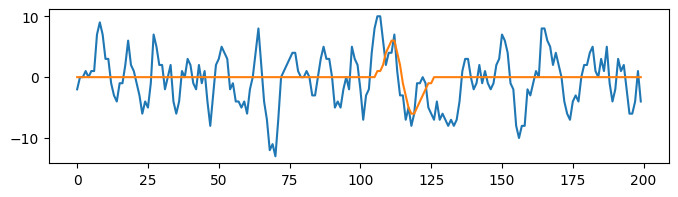

In [15]:
fig = plt.figure(figsize=(8,2))
plt.plot(grouped_samples[0][2][0][100])
plt.plot(grouped_samples[0][2][1][100])
plt.show()

In [16]:
train_set = np.concatenate((adc_0_x_train, adc_1_x_train, adc_2_x_train, adc_3_x_train, adc_4_x_train, adc_5_x_train, adc_6_x_train))

In [17]:
train_set.shape

(22400, 200)

In [18]:
mean = np.mean(train_set)
std = np.std(train_set)

In [19]:
np.save('./small_sample/mean_' + wireplane, mean)
np.save('./small_sample/std_' + wireplane, std)
np.save('./small_sample/processed_'+wireplane, grouped_samples)